## Observations and Insights 
 1. There is a high correlation between weight of the mouse and the tumor volume. The heavier the mouse the larger the tumor.

2. Ramicane seems to have the best rate of riding the mice of the tumors. It is shown by a low outlier’s limit for tumor volume and the lowest median tumor volume.

3. Capomulin and Ramicane had the largest data sets from the drug regiment so the data from those drugs would have the best data on whether the drug was working. These two drugs also had the lowest mean, median, variance, standard deviation, and SEM. So, either one of these drugs would be good to use for a secondary trail.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
both = pd.merge(mouse_metadata,study_results,on = "Mouse ID",how = "outer")

# Display the data table for preview
both

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#checking number of rows before removing them
both['Mouse ID'].count()

1893

In [3]:
# Checking the number of mice.
mcount = len(both['Mouse ID'].unique())
mcount

249

In [4]:
#Find a single mouse
duplicated_mouse_id = both.loc[both.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicated_mouse_id

array(['g989'], dtype=object)

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Use Dataframe.duplicated. Do a loc inside the duplicate
test = both.copy()

#I tried running through it twice to see if the first time only grabbed one Mouse ID
delboth = test.drop_duplicates(subset = ['Mouse ID','Timepoint'], keep= 'first')
delboth


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
#Reviewing the duplicates
alldup = both.loc[both.duplicated(subset = ['Mouse ID','Timepoint'], keep= False)== True]
print(len(alldup))
alldup

10


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#dropping the Duplicates and creating a clean database
clboth  = both.drop_duplicates(subset = ['Mouse ID','Timepoint'], keep= 'first')
clboth

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
#counting the number of mice in the clean dataframe
clcount = len(clboth['Mouse ID'].unique())
clcount

249

## Summary Statistics

In [9]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#creating the Data
tmean = clboth.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tmed = clboth.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tstd = clboth.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tvar = clboth.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tsem = clboth.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#adding the data into a DataFrame
drugsum = pd.DataFrame({"Mean" : tmean,
                                     "Median" : tmed,
                                     "Variance" : tvar,
                                     "Standard Deviation" : tstd,
                                     "SEM" : tsem})
#changing the formating to 2 decimals
drugsum['Mean'] = round(drugsum['Mean'],2)
drugsum['Median'] = round(drugsum['Mean'],2)
drugsum['Variance'] = round(drugsum['Variance'],2)
drugsum['Standard Deviation'] = round(drugsum['Standard Deviation'],2)
drugsum['SEM'] = round(drugsum['SEM'],2)
drugsum

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,40.68,24.95,4.99,0.33
Ceftamin,52.59,52.59,39.29,6.27,0.47
Infubinol,52.88,52.88,43.13,6.57,0.49
Ketapril,55.24,55.24,68.55,8.28,0.60
Naftisol,54.33,54.33,66.17,8.13,0.60
Placebo,54.03,54.03,61.17,7.82,0.58
Propriva,52.39,52.39,43.14,6.57,0.53
Ramicane,40.22,40.22,23.49,4.85,0.32
Stelasyn,54.23,54.23,59.45,7.71,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
dsum = clboth.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean' ,'median','var','std','sem'])
#Changing the formatting
dsum['mean'] = round(dsum['mean'],2)
dsum['median'] = round(dsum['median'],2)
dsum['var'] = round(dsum['var'],2)
dsum['std'] = round(dsum['std'],2)
dsum['sem'] = round(dsum['sem'],2)
dsum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

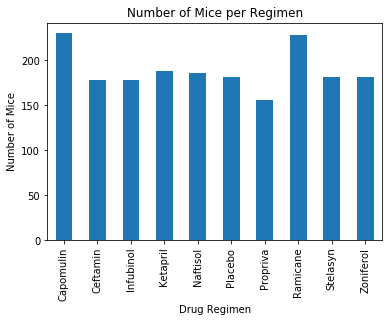

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#grouping by drug regimen and creating a count
pdata = clboth.groupby(['Drug Regimen']).agg({'Mouse ID':'count'})
#creating the bar chart
pbar = pdata.plot.bar(title = 'Number of Mice per Regimen',legend = False)
pbar.set_ylabel("Number of Mice")

plt.show()

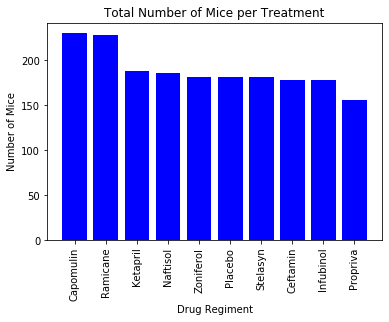

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#getting a value count of the drug regimens
reg = clboth['Drug Regimen'].value_counts()
#creating the labels and counts  from the dictionary
name = reg.keys()
num = list(reg)
#creating the bar chart
plt.bar(name,num,color = 'b',align = 'center')
#Changing the labels 
plt.title("Total Number of Mice per Treatment")
plt.xlabel('Drug Regiment')
plt.ylabel('Number of Mice')
plt.xticks(name, rotation='vertical')

plt.show()

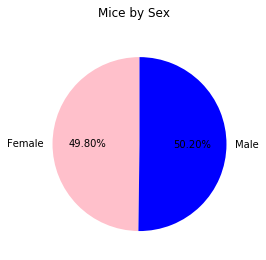

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#dropping the duplicates to get the number of mice 
gdata = clboth.drop_duplicates('Mouse ID')
#grouping by sex to get a count
gdata = gdata.groupby(['Sex']).agg({'Mouse ID':'count'})
#renaming the columns
gdata = gdata.rename(columns ={'Mouse ID': ""})
#creating the pie chart
gbar = gdata.plot.pie(subplots = True , colors = ['pink','blue'], title = 'Mice by Sex',autopct = "%.2f%%", startangle = 90, legend = False)

plt.show()

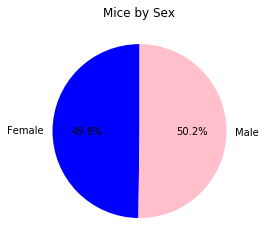

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Getting rid of the duplicates to get the number of mice
gen = clboth.drop_duplicates('Mouse ID')
#grouping the mice by gender to get a count
gen = gen.groupby('Sex')['Mouse ID'].count()
#creating the labels from the dictionary
label = gen.keys()
#pulling the data from the dictionary 
gnum = list(gen)

#Creating the pie chart
plt.pie(gnum,labels = label,autopct = '%1.1f%%',startangle = 90,
         colors = ['blue','pink'])
#adding a title
plt.title("Mice by Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
lasttime = clboth.groupby("Mouse ID")[["Timepoint"]].max()
lasttime
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(lasttime,clboth,on=["Mouse ID","Timepoint"])
tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


treat1 = list(clboth['Drug Regimen'].unique())
treat = []

for i in treat1:
    if i in ('Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin'):
        treat.append(i)


# Create empty list to fill with tumor vol data (for plotting)
tumdata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#for loop to go through the data
for treatment in treat:
    treat_tumor = tumor_df.loc[tumor_df['Drug Regimen'] == treatment]
    quartiles = treat_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f'For the Treatment of {treatment} the results are:')
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {round(quartiles[0.5],2)} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print('\n----------------------------------------\n')


         
    # Locate the rows which contain mice on each drug and get the tumor volumes
#locating final Tumor Volumes for each drug
cap = tumor_df.loc[(tumor_df['Drug Regimen'] == 'Capomulin')]
ram = tumor_df.loc[(tumor_df['Drug Regimen'] =='Ramicane')]
inf = tumor_df.loc[(tumor_df['Drug Regimen'] == 'Infubinol')]
cef = tumor_df.loc[(tumor_df['Drug Regimen'] == 'Ceftamin')]

#making the Tumor volumes into lists
ram = np.array(list(ram['Tumor Volume (mm3)'])).astype(np.float)
cap1 = np.array(list(cap['Tumor Volume (mm3)'])).astype(np.float)
inf = np.array(list(inf['Tumor Volume (mm3)'])).astype(np.float)
cef = np.array(list(cef['Tumor Volume (mm3)'])).astype(np.float)

#placing Lists into list
tlist = [ram,cap1,inf,cef]


# Locate the rows which contain mice on each drug and get the tumor volumes
alldrug = tumor_df.loc[tumor_df['Drug Regimen'].isin(treat)]
alldrug

# add subset
all_drugs_rows = alldrug[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
all_drugs_rows


For the Treatment of Ramicane the results are:
The lower quartile of Tumor Volume is: 31.56
The upper quartile of Tumor Volume is: 40.66
The interquartile range of Tumor Volume is: 9.1
The the median of Tumor Volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

----------------------------------------

For the Treatment of Capomulin the results are:
The lower quartile of Tumor Volume is: 32.38
The upper quartile of Tumor Volume is: 40.16
The interquartile range of Tumor Volume is: 7.78
The the median of Tumor Volume is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.

----------------------------------------

For the Treatment of Infubinol the results are:
The lower quartile of Tumor Volume is: 54.05
The upper quartile of Tumor Volume is: 65.53
The interquartile range of Tumor Volume is: 11.48
The the median of Tumor Volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
239,y769,Ceftamin,68.594745
240,y793,Capomulin,31.896238
241,y865,Ceftamin,64.729837
245,z578,Ramicane,30.638696


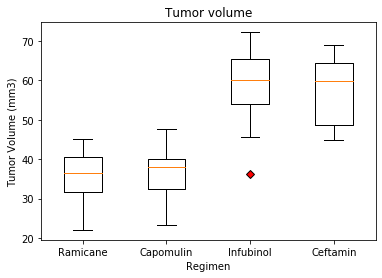

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


#setting the sizes
tsize = tumor_df['Tumor Volume (mm3)']

#creating the box plot 
bplot, ax1, = plt.subplots()
figp = dict(markerfacecolor='r', marker='D')
#Adding titles and labels
ax1.set_title('Tumor volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tlist, flierprops = figp)
plt.xticks(np.arange(len(treat))+1,treat)
plt.xlabel("Regimen")

plt.show()



## Line and Scatter Plots

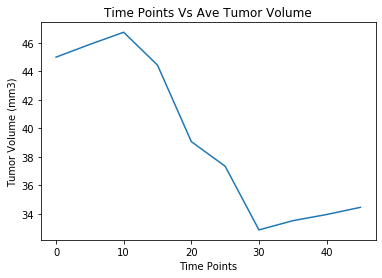

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#choosing a single mouse to put to the line graph
singlecap = clboth.loc[(clboth['Mouse ID'] == 't565')]

#making X and y list values 
x_values = singlecap['Timepoint']
y_values = singlecap['Tumor Volume (mm3)']
#creating the plotting for the values collected
plt.plot(x_values,y_values)
# adding the labels
plt.xlabel("Time Points")
plt.ylabel('Tumor Volume (mm3)')
plt.title('Time Points Vs Ave Tumor Volume')
plt.show()


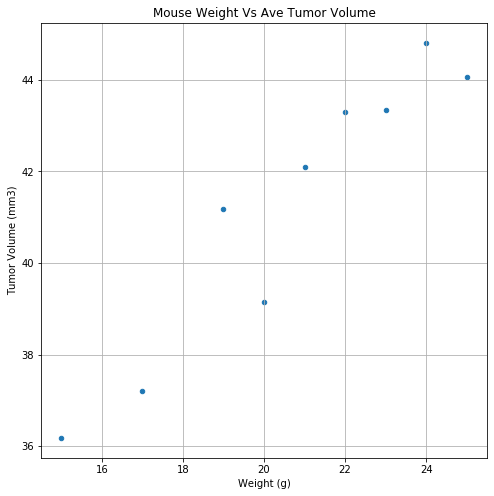

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#getting the values for Capomulin
fullcap = clboth.loc[(clboth['Drug Regimen'] == 'Capomulin')]

# sellecting only the columns we need
fullcap = fullcap[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

#sorting the values
sortcap = fullcap.sort_values(["Weight (g)"], ascending=True)
#getting the mean of the Tumor values by weight
grcapW = sortcap.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
Wcapplot = pd.DataFrame(grcapW).reset_index()

#Creating a scatter plot
Wcapplot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
plt.title('Mouse Weight Vs Ave Tumor Volume')
plt.show()

## Correlation and Regression

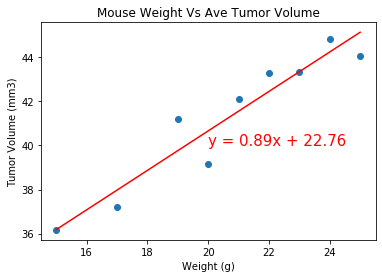

The Correlation Coefficient is 0.951
The Linear Regression Model is y =0.89x + 22.76


numpy.int64

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Corrcap = Wcapplot.corr()
corrcap = round(Corrcap['Weight (g)'][1],3)

##Creating the linear regression model
x_values = Wcapplot['Weight (g)']
y_values = Wcapplot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight Vs Ave Tumor Volume')
plt.show()
#printing the correlation Coeficient and linear regression model
print(f'The Correlation Coefficient is {corrcap}')
print(f'The Linear Regression Model is y ={round(slope,2)}x + {round(intercept,2)}')

type(Wcapplot['Weight (g)'][1])